In [2]:
import scipy
from scipy import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import MultipleLocator
from collections import Counter
from scipy.stats import multivariate_normal
import os

In [3]:
def perturb(X, Y, Z, sigma=0.1, rho=-0.5):
    prior = multivariate_normal(mean=np.zeros(2), cov=np.array([[1, rho], [rho, 1]]))
    noise_X = prior.rvs(size=1) * sigma
    noise_Y = prior.rvs(size=1) * sigma
    noise_Z = prior.rvs(size=1) * sigma
    X_obs0 = np.expand_dims(X + noise_X[0], axis=0)
    X_obs1 = np.expand_dims(X + noise_X[1], axis=0)
    Y_obs0 = np.expand_dims(Y + noise_Y[0], axis=0)
    Y_obs1 = np.expand_dims(Y + noise_Y[1], axis=0)
    Z_obs0 = np.expand_dims(Z + noise_Z[0], axis=0)
    Z_obs1 = np.expand_dims(Z + noise_Z[1], axis=0)
    XYZ_obs = np.concatenate((X_obs0, Y_obs0, Z_obs0, X_obs1, Y_obs1, Z_obs1), 0)
    return XYZ_obs

def lorenz_system_euler(
    initial_state = (1.0, 1.0, 1.0),
    num_steps: int = 10000,
    dt: float = 0.01,
    sigma: float = 10.0,
    rho: float = 28.0,
    beta: float = 8/3
) -> np.ndarray:
    trajectory = np.zeros((num_steps, 3))
    trajectory_noise = np.zeros((num_steps, 6))
    
    trajectory[0] = initial_state
    trajectory_noise[0] = [1, 1, 1, 1, 1, 1]
    for i in range(1, num_steps):
        x, y, z = trajectory[i-1]
        dx = sigma * (y - x)
        dy = x * (rho - z) - y
        dz = x * y - beta * z
        
        x_temp = x + dx * dt
        y_temp = y + dy * dt
        z_temp = z + dz * dt
        trajectory[i, 0] = x_temp
        trajectory[i, 1] = y_temp
        trajectory[i, 2] = z_temp
        trajectory_noise[i] = perturb(x_temp, y_temp, z_temp)

    return trajectory, trajectory_noise

def plot_3d(trajectory, title="Lorenz Attractor"):

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.plot(trajectory[0] if isinstance(trajectory, np.ndarray) and 
            trajectory.shape[0] == 3 else trajectory[:, 0],
            trajectory[1] if isinstance(trajectory, np.ndarray) and 
            trajectory.shape[0] == 3 else trajectory[:, 1],
            trajectory[2] if isinstance(trajectory, np.ndarray) and 
            trajectory.shape[0] == 3 else trajectory[:, 2],
            lw=0.5, alpha=0.8, color='blue')
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    # ax.set_title(f"{title} (σ={sigma}, ρ={rho}, β={beta})")
    plt.show()

In [4]:
data, data_noise = lorenz_system_euler(sigma=0)

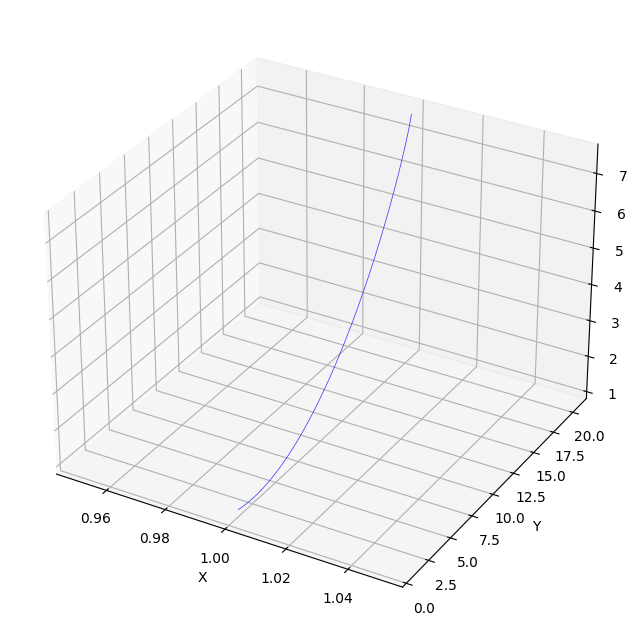

In [5]:
plot_3d(data)

In [1]:
# plt.plot(data[:,0], label='1')
# plt.plot(data[:,1], label='2')
# plt.plot(data[:,2], label='3')

In [7]:
data_frame = pd.DataFrame(data_noise)
data_index = data_frame.reset_index()

In [8]:
data_index.to_csv('../dataset/Lorzen/data_%s_no_noise.csv'%(data_index.shape[0]), index=False)